# **A. Business Background**

## Business Requirement
An Indonesian investment startup which makes an application that can buy and sell mutual funds. The mutual funds consist of: stocks mutual funds (saham), bond mutual funds(pendapatan tetap), money market mutual funds (pasar uang), and mixed-investment mutual funds(campuran).
Our objective is to analyze the data in order to identify trend and group of user based on their demograpich and transaction in each mutual funds. By understanding user segmentation, we can find appropriate thematic campaign to the marketing team in the next month.

## Dataset

 ### User 
https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/edit#gid=0

 
 ### daily_user_transaction
https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/edit#gid=0

 ### data dictionary
https://docs.google.com/spreadsheets/d/1gzGutT2kczT0dbEwDqqa27p6MMOYQuZWvV2MUqNPY6c/edit#gid=1180665284




# **B.Data Preparation**

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from datetime import datetime
from datetime import timedelta

## Import Dataset

### User

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/edit#gid=0'
sheet_url_tf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_user = pd.read_csv(sheet_url_tf)
df_user.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


In [ ]:
df_user['user_gender']=df_user['user_gender'].astype('category')

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   user_id                       14712 non-null  int64   
 1   registration_import_datetime  14712 non-null  object  
 2   user_gender                   14712 non-null  category
 3   user_age                      14712 non-null  int64   
 4   user_occupation               14712 non-null  object  
 5   user_income_range             14712 non-null  object  
 6   referral_code_used            5604 non-null   object  
 7   user_income_source            14712 non-null  object  
 8   end_of_month_invested_amount  14712 non-null  int64   
 9   total_buy_amount              14712 non-null  int64   
 10  total_sell_amount             14712 non-null  int64   
dtypes: category(1), int64(5), object(5)
memory usage: 1.1+ MB


### daily_user_transaction

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/edit#gid=0'
sheet_url_tf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_trans = pd.read_csv(sheet_url_tf)
df_trans.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


# **C.Data Cleaning**




## User

### Check data type

In [ ]:
df_user.shape

(14712, 11)

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   user_id                       14712 non-null  int64   
 1   registration_import_datetime  14712 non-null  object  
 2   user_gender                   14712 non-null  category
 3   user_age                      14712 non-null  int64   
 4   user_occupation               14712 non-null  object  
 5   user_income_range             14712 non-null  object  
 6   referral_code_used            5604 non-null   object  
 7   user_income_source            14712 non-null  object  
 8   end_of_month_invested_amount  14712 non-null  int64   
 9   total_buy_amount              14712 non-null  int64   
 10  total_sell_amount             14712 non-null  int64   
dtypes: category(1), int64(5), object(5)
memory usage: 1.1+ MB


In [ ]:
df_user1 = df_user.copy()

In [ ]:
#rename the column to make it short
df_user1.rename(columns={'registration_import_datetime':'date_register'}, inplace=True) 
#converting the data type
df_user1['date_register'] = pd.to_datetime(df_user1['date_register']) 
df_user1['user_id']=df_user1['user_id'].astype(str)
df_user1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   date_register                 14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  category      
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            5604 non-null   object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
dtypes: category(1), datetime64[n

In [ ]:
df_user1.isnull().sum() 

user_id                            0
date_register                      0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
end_of_month_invested_amount       0
total_buy_amount                   0
total_sell_amount                  0
dtype: int64

Insight:
   
*   rename the column "registration_import_datetime" and convert the data type 
from object to datetime
*  There are 9108 row null in "referral_code_used"


    

Check Value and typo

In [ ]:
df_user1.columns

Index(['user_id', 'date_register', 'user_gender', 'user_age',
       'user_occupation', 'user_income_range', 'referral_code_used',
       'user_income_source', 'end_of_month_invested_amount',
       'total_buy_amount', 'total_sell_amount'],
      dtype='object')

In [ ]:
df_user1[df_user1.columns[2]].value_counts()

Male      8977
Female    5735
Name: user_gender, dtype: int64

In [ ]:
df_user1[df_user1.columns[3]].value_counts()

21    1192
20    1058
23    1031
19     972
22     963
24     901
25     792
18     771
26     744
27     668
28     605
29     553
30     458
31     415
32     346
33     280
17     268
34     262
35     262
36     229
37     194
38     166
39     162
42     143
41     138
40     129
43     107
44      90
49      82
46      81
45      80
48      75
47      68
51      58
52      57
50      48
54      47
53      38
55      34
56      32
57      24
58      15
59      13
60      10
64       9
61       8
62       7
63       6
65       5
67       3
71       3
66       3
69       2
76       1
74       1
73       1
83       1
82       1
Name: user_age, dtype: int64

insight : We can make a new category

In [ ]:
df_user1[df_user1.columns[4]].value_counts()

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64

In [ ]:
df_user1[df_user1.columns[5]].value_counts()

< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64

insight : We can make a new category

In [ ]:
df_user1[df_user1.columns[6]].value_counts()

used referral    5604
Name: referral_code_used, dtype: int64

In [ ]:
df_user1[df_user1.columns[7]].value_counts()

Gaji                     9131
Keuntungan Bisnis        1908
Dari Orang Tua / Anak    1307
Undian                   1001
Tabungan                  419
Lainnya                   414
Dari Suami / istri        300
Hasil Investasi           165
Warisan                    43
Bunga Simpanan             24
Name: user_income_source, dtype: int64

In [ ]:
df_user1[df_user1.columns[8]].value_counts()

0            8528
100000       1107
10000         686
200000        470
500000        250
             ... 
900000000       1
3275000         1
1730000         1
251604          1
71100000        1
Name: end_of_month_invested_amount, Length: 1042, dtype: int64

In [ ]:
df_user1[df_user1.columns[9]].value_counts()

0           11206
100000        399
25000         298
200000        157
10000         152
            ...  
136135          1
300446          1
2230000         1
254689          1
31040000        1
Name: total_buy_amount, Length: 824, dtype: int64

In [ ]:
df_user1[df_user1.columns[10]].value_counts()

 0          12216
-10000        494
-100000       440
-200000       112
-500000        75
            ...  
-201309         1
-95000          1
-481057         1
-1800000        1
-1250000        1
Name: total_sell_amount, Length: 548, dtype: int64

In [ ]:
#Checking typos
df_user1['user_gender'].unique()
df_user1['user_occupation'].unique()
df_user1['user_income_range'].unique()
df_user1['referral_code_used'].unique()
df_user1['user_income_source'].unique()

array(['Gaji', 'Keuntungan Bisnis', 'Lainnya', 'Dari Orang Tua / Anak',
       'Undian', 'Tabungan', 'Warisan', 'Hasil Investasi',
       'Dari Suami / istri', 'Bunga Simpanan'], dtype=object)

Insight:
There are no typos found and I considered all columns are relevant so I didn't drop any 

### Handling Missing Data

Since the null value is only in "referral_code_used" and it is feel free to fill it.

In [ ]:
df_user1['referral_code_used']=df_user1['referral_code_used'].fillna(value = 'not_using_referral')

In [ ]:
#confirm the null data is still exist
df_user1.isna().sum()

user_id                         0
date_register                   0
user_gender                     0
user_age                        0
user_occupation                 0
user_income_range               0
referral_code_used              0
user_income_source              0
end_of_month_invested_amount    0
total_buy_amount                0
total_sell_amount               0
dtype: int64

### Removing Duplicate

In [ ]:
df_user1[df_user1['user_id'].duplicated()]

,user_id,date_register,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount


Insight: There is no duplicated values

### Data Manipulation

In [ ]:
#check the unique value
df_user1['user_age'].value_counts() 

21    1192
20    1058
23    1031
19     972
22     963
24     901
25     792
18     771
26     744
27     668
28     605
29     553
30     458
31     415
32     346
33     280
17     268
34     262
35     262
36     229
37     194
38     166
39     162
42     143
41     138
40     129
43     107
44      90
49      82
46      81
45      80
48      75
47      68
51      58
52      57
50      48
54      47
53      38
55      34
56      32
57      24
58      15
59      13
60      10
64       9
61       8
62       7
63       6
65       5
67       3
71       3
66       3
69       2
76       1
74       1
73       1
83       1
82       1
Name: user_age, dtype: int64

In [ ]:
# knowing the youngest and the oldest age of user
df_user1['user_age'].describe()

count    14712.000000
mean        27.176591
std          8.552585
min         17.000000
25%         21.000000
50%         25.000000
75%         31.000000
max         83.000000
Name: user_age, dtype: float64

In [ ]:
#assign the data into the bin / category we assign the column into a variable
a = df_user1['user_age'] 

In [ ]:
#Creating birth year with assuming current year
df_user1['Birth_Year'] = abs(df_user1['user_age'] - 2023)
df_user1.describe(include='all')

<ipython-input-29-424cd7d1a738>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_user1.describe(include='all')


,user_id,date_register,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Birth_Year
count,14712,14712,14712,14712.000000,14712,14712,14712,14712,1.471200e+04,1.471200e+04,1.471200e+04,14712.000000
unique,14712,11536,2,NaN,9,6,2,10,NaN,NaN,NaN,NaN
top,162882,2021-09-01 19:28:19,Male,NaN,Pelajar,< 10 Juta,not_using_referral,Gaji,NaN,NaN,NaN,NaN
freq,1,5,8977,NaN,7887,6275,9108,9131,NaN,NaN,NaN,NaN
first,NaN,2021-08-01 00:11:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-10-27 12:35:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,27.176591,NaN,NaN,NaN,NaN,1.445996e+06,8.427521e+05,-1.648629e+05,1995.823409
std,NaN,NaN,NaN,8.552585,NaN,NaN,NaN,NaN,1.907388e+07,1.289743e+07,2.716129e+06,8.552585
min,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,-1.850000e+08,1940.000000
25%,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1992.000000


In [ ]:
#make a category
filter = [
    (df_user1.Birth_Year >=1940) & (df_user1.Birth_Year <=1964),
    (df_user1.Birth_Year >=1965) & (df_user1.Birth_Year <=1980),
    (df_user1.Birth_Year >=1981) & (df_user1.Birth_Year <=1996),
    (df_user1.Birth_Year >=1997) & (df_user1.Birth_Year <=2006)
]
values =['Boomers','GenX','Millenial','GenZ']

In [ ]:
#Adding the filter to create age group
df_user1['Age_Category'] = np.select(filter, values)
df_user1.head()

,user_id,date_register,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Birth_Year,Age_Category
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,not_using_referral,Gaji,0,0,0,1972,GenX
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,not_using_referral,Gaji,0,0,0,1968,GenX
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,not_using_referral,Gaji,0,0,0,1973,GenX
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not_using_referral,Gaji,600000,100000,0,1970,GenX
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0,1976,GenX


In [ ]:
df_user1.shape

(14712, 13)

### Clean Data

In [ ]:
#Create a copy after cleaning for other purpose, and its easier if there is something forgoten and needed to be clean later
df_user1 = df_user1.copy() 
df_user1.head()

,user_id,date_register,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Birth_Year,Age_Category
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,not_using_referral,Gaji,0,0,0,1972,GenX
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,not_using_referral,Gaji,0,0,0,1968,GenX
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,not_using_referral,Gaji,0,0,0,1973,GenX
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not_using_referral,Gaji,600000,100000,0,1970,GenX
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0,1976,GenX


In [ ]:
#For summary after data cleaning
df_user1.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   date_register                 14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  category      
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
 11  Birth_Year                  

## daily_user_transaction

### Check data type

In [ ]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  int64  
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1808 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          46 non-null      float64
 10  total_buy_transactio

In [ ]:
#Change type to datetime64 
df_trans['date'] = pd.to_datetime(df_trans['date'])
df_trans['user_id']=df_trans['user_id'].astype(str)
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              99031 non-null   float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           5072 non-null    float64       
 9   sell_campuran_t

### Data Manipulation

In [ ]:
zero_null =[
    'buy_saham_transaction_amount',            
    'sell_saham_transaction_amount',          
    'buy_pasar_uang_transaction_amount',       
    'sell_pasar_uang_transaction_amount',      
    'buy_pendapatan_tetap_transaction_amount', 
    'sell_pendapatan_tetap_transaction_amount',
    'buy_campuran_transaction_amount',         
    'sell_campuran_transaction_amount',       
    'total_buy_transaction_amount',            
    'total_sell_transaction_amount'] 

df_trans[zero_null] = df_trans[zero_null].replace(0, np.nan)
df_trans

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000.0,10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0
158807,4165132,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,NaN,NaN,10000
158808,4165630,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000.0,10000.0,50000.0,NaN,100000
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,NaN,10000


### Check Value and typo

In [ ]:
#There's no typo int INT or float type data

### Handling Missing Data

In [ ]:
#Still can't decide handling missing value, due to prevent missing calculation in EDA

### Removing Duplicated

In [ ]:
#There is duplicate in user_id because of it's daily transaction log data, and it make iteration for each day
#Duplicated user_id won't be removed because of this reason
duplicate = df_trans['user_id'].duplicated()
duplicate

0         False
1          True
2          True
3          True
4          True
          ...  
158806    False
158807    False
158808    False
158809    False
158810    False
Name: user_id, Length: 158811, dtype: bool

### Clean Data

In [ ]:
df_trans1 = df_trans.copy()
df_trans1.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000.0,10000000


In [ ]:
df_trans1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              3471 non-null    float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         4426 non-null    float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   4086 non-null    float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           131 non-null     float64       
 9   sell_campuran_t

### Droping Irrelevant Value

In [ ]:
drop_df_trans = df_trans1.copy()
drop_df_trans = drop_df_trans.drop(['saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount','total_invested_amount'],axis=1, inplace=False)
drop_df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 12 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              3471 non-null    float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         4426 non-null    float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   4086 non-null    float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           131 non-null     float64       
 9   sell_campuran_t

In [ ]:
summary_trans = drop_df_trans.groupby('user_id').sum()[zero_null]
summary_trans

<ipython-input-44-7b3479e2a9b9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_trans = drop_df_trans.groupby('user_id').sum()[zero_null]


,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount
user_id,,,,,,,,,,
1004326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018814,0.0,0.0,0.0,-1300000.0,0.0,0.0,0.0,0.0,0.0,-1300000.0
1023627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
988940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
989618,480000.0,0.0,100000.0,0.0,1420000.0,0.0,0.0,0.0,2000000.0,0.0
990466,770000.0,0.0,150000.0,0.0,580000.0,0.0,0.0,0.0,1500000.0,0.0


Reason of dropping : The value is overlapping

## Merge Data

In [ ]:
df_merged = df_user1.merge(summary_trans, how='left', left_on =['user_id'], right_on =['user_id'])
df_active = df_user1.merge(summary_trans, how='inner', left_on =['user_id'], right_on =['user_id'])
df_merged.head()

,user_id,date_register,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,not_using_referral,Gaji,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,not_using_referral,Gaji,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,not_using_referral,Gaji,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not_using_referral,Gaji,600000,100000,...,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,0.0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,...,5620000.0,0.0,850000.0,0.0,2030000.0,0.0,0.0,0.0,8500000.0,0.0


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14712 entries, 0 to 14711
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   14712 non-null  object        
 1   date_register                             14712 non-null  datetime64[ns]
 2   user_gender                               14712 non-null  category      
 3   user_age                                  14712 non-null  int64         
 4   user_occupation                           14712 non-null  object        
 5   user_income_range                         14712 non-null  object        
 6   referral_code_used                        14712 non-null  object        
 7   user_income_source                        14712 non-null  object        
 8   end_of_month_invested_amount              14712 non-null  int64         
 9   total_buy_amount            

In [ ]:
df_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   8277 non-null   object        
 1   date_register                             8277 non-null   datetime64[ns]
 2   user_gender                               8277 non-null   category      
 3   user_age                                  8277 non-null   int64         
 4   user_occupation                           8277 non-null   object        
 5   user_income_range                         8277 non-null   object        
 6   referral_code_used                        8277 non-null   object        
 7   user_income_source                        8277 non-null   object        
 8   end_of_month_invested_amount              8277 non-null   int64         
 9   total_buy_amount              

## Removing Outlier

In [ ]:
# Count outliers in user_age
def find_outliers_IQR(df_user1):
   q1=df_user1.quantile(0.25)
   q3=df_user1.quantile(0.75)
   IQR=q3-q1
   outliers = df_user1[((df_user1<(q1-1.5*IQR)) | (df_user1>(q3+1.5*IQR)))]
   return outliers
outliers = find_outliers_IQR(df_user1['user_age'])
print('Number of outliers in user_age column: '+ str(len(outliers)))
print('Outliers to total user ratio: '+ str(len(outliers)/df_user1['user_age'].count()))

Number of outliers in user_age column: 652
Outliers to total user ratio: 0.044317563893420335


The outlier didn't remove because it is the natural of data and considered will give insight.

In [ ]:
#checking outlier in daily_user_transaction
df_trans['buy_saham_transaction_amount'].skew()

14.131842675786567

In [ ]:
numerical_column = ['buy_saham_transaction_amount', 'buy_pasar_uang_transaction_amount', 'buy_pendapatan_tetap_transaction_amount', 'buy_campuran_transaction_amount']
for a, b in enumerate(numerical_column):
  # Take data in b column, create the boxplot, and put it in subplot a
  print(a,b)

0 buy_saham_transaction_amount
1 buy_pasar_uang_transaction_amount
2 buy_pendapatan_tetap_transaction_amount
3 buy_campuran_transaction_amount


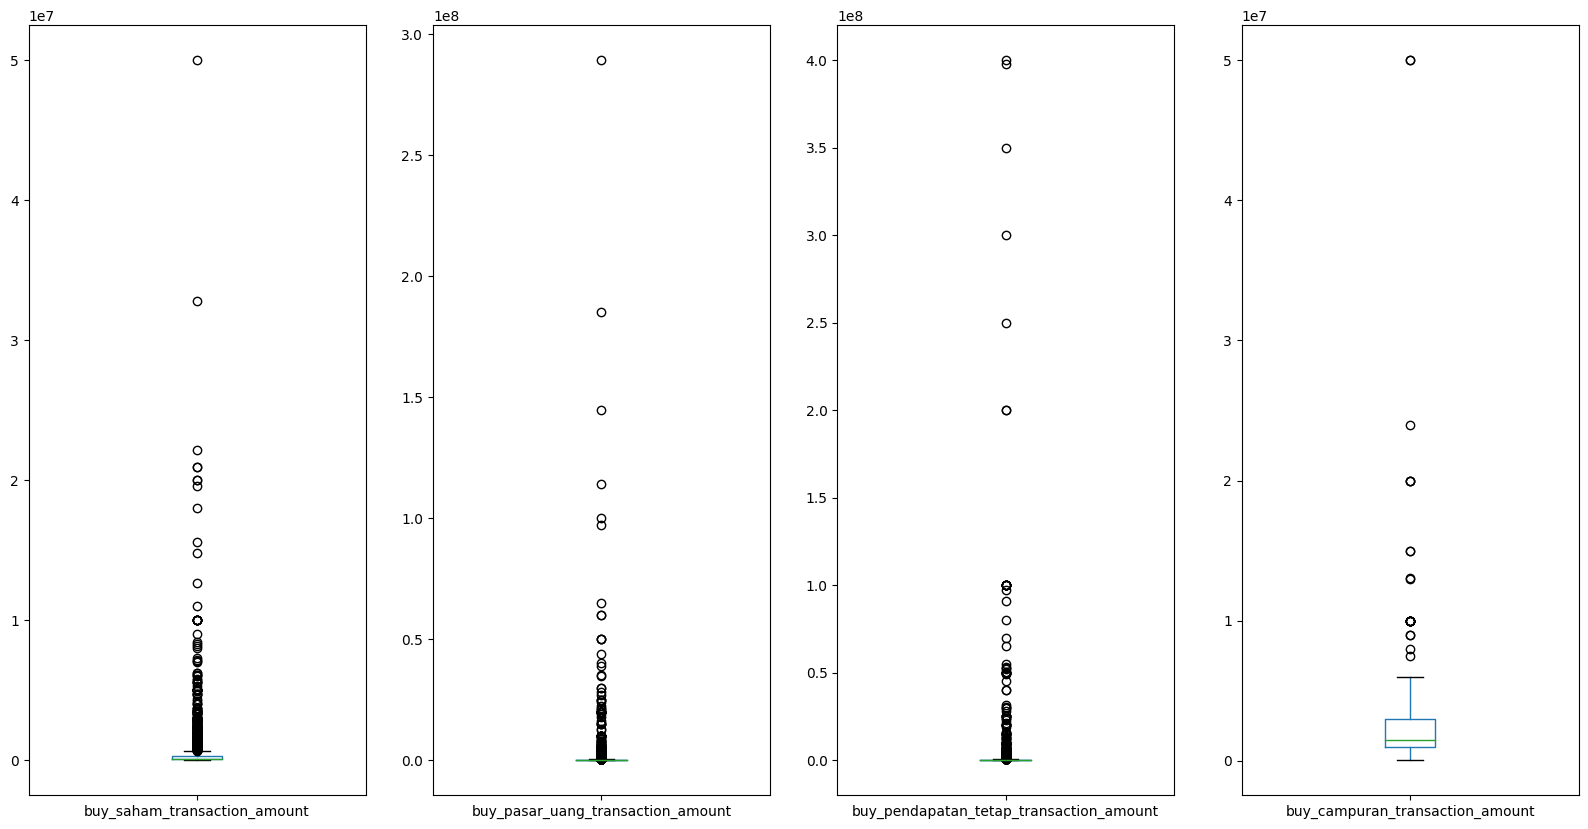

In [ ]:
numerical_column = ['buy_saham_transaction_amount', 'buy_pasar_uang_transaction_amount', 'buy_pendapatan_tetap_transaction_amount', 'buy_campuran_transaction_amount']

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df_trans.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

There is an outlier in the upper bound but it didn't remove because it's daily transaction data with 0 values and perhaps will generate insight.

# D.Exploratory Data Analysis

In [ ]:
#Preparing a copy of df_clean for EDA
df_eda = df_active.copy()
df_eda.head()

,user_id,date_register,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not_using_referral,Gaji,600000,100000,...,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,0.0
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,...,5620000.0,0.0,850000.0,0.0,2030000.0,0.0,0.0,0.0,8500000.0,0.0
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,not_using_referral,Gaji,999000,149000,...,0.0,0.0,0.0,0.0,0.0,0.0,149000.0,0.0,149000.0,0.0
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,10000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,not_using_referral,Gaji,110431,1000000,...,370000.0,-740000.0,100000.0,-200000.0,530000.0,-949569.0,0.0,0.0,1000000.0,-1889569.0


In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   8277 non-null   object        
 1   date_register                             8277 non-null   datetime64[ns]
 2   user_gender                               8277 non-null   category      
 3   user_age                                  8277 non-null   int64         
 4   user_occupation                           8277 non-null   object        
 5   user_income_range                         8277 non-null   object        
 6   referral_code_used                        8277 non-null   object        
 7   user_income_source                        8277 non-null   object        
 8   end_of_month_invested_amount              8277 non-null   int64         
 9   total_buy_amount              

Descriptive Statistics:

*   How many users do we have in the data?
*   How is the demographic in the data?
*   How many users buy products in each mutual funds?






### Descriptive information about numeric variable


In [ ]:
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

numeric = ['buy_saham_transaction_amount','sell_saham_transaction_amount','buy_pasar_uang_transaction_amount','sell_pasar_uang_transaction_amount','buy_pendapatan_tetap_transaction_amount','sell_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount','sell_campuran_transaction_amount','saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount']

desc_eda = df_trans1[numeric].describe()
desc_eda.loc['kurtosis'] = df_trans1[numeric].kurt() 
desc_eda.loc['skewness'] = df_trans1[numeric].skew() 
desc_eda.loc['variance'] = df_trans1[numeric].var()
desc_eda.round(2)

,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
count,3.471000e+03,1.808000e+03,4.426000e+03,2.010000e+03,4.086000e+03,1.581000e+03,1.310000e+02,4.600000e+01,1.062920e+05,1.310810e+05,1.059460e+05,5.352000e+03
mean,4.581811e+05,-2.550454e+05,8.417620e+05,-5.056617e+05,1.603318e+06,-4.872123e+05,4.056695e+06,-3.862567e+06,4.423400e+05,8.409062e+05,1.782458e+06,7.810109e+06
std,1.685435e+06,7.324554e+05,6.956941e+06,5.049578e+06,1.437232e+07,3.584982e+06,7.390676e+06,8.621733e+06,2.135788e+06,1.410083e+07,2.340237e+07,2.508261e+07
min,1.140000e+02,-1.176680e+07,9.280000e+02,-1.850000e+08,2.800000e+01,-9.271240e+07,5.000000e+04,-5.000000e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+04,-1.804692e+05,2.000000e+04,-1.000000e+05,2.500000e+04,-1.500000e+05,1.000000e+06,-3.375000e+06,1.000000e+04,1.000000e+04,2.500000e+04,7.500000e+05
50%,1.000000e+05,-6.000000e+04,8.000000e+04,-2.000000e+04,1.000000e+05,-5.050000e+04,1.500000e+06,-1.000000e+06,5.000000e+04,2.000000e+04,6.500000e+04,1.500000e+06
75%,3.000000e+05,-4.000000e+04,2.100000e+05,-1.000000e+04,2.800000e+05,-4.000000e+04,3.000000e+06,-5.875000e+05,2.000000e+05,1.100000e+05,2.400000e+05,5.000000e+06
max,5.000000e+07,-1.108000e+03,2.892000e+08,-4.000000e+03,4.000000e+08,-1.000000e+00,5.000000e+07,-5.000000e+04,6.184000e+07,1.012200e+09,9.700000e+08,3.000000e+08
kurtosis,2.993800e+02,8.692000e+01,8.582800e+02,9.669000e+02,4.601200e+02,4.392400e+02,2.212000e+01,1.988000e+01,2.768000e+02,3.938110e+03,1.135140e+03,8.544000e+01
skewness,1.413000e+01,-7.980000e+00,2.561000e+01,-2.883000e+01,1.967000e+01,-1.922000e+01,4.210000e+00,-4.250000e+00,1.423000e+01,5.799000e+01,3.131000e+01,8.500000e+00



*   There are 8.277 users that still active in transaction in ou platform
*   The highest amount of buy transactions is pendapatan tetap product with 799,500,000.00 rupiah, meanwhile campuran product has the lowest amount of buy transaction compared to others with 51,000,000.00 rupiah.
*   The highest amount of sell transaction is pasasr uang product with total 185,500,000.00





In [ ]:
#pd.set_option('display.int_format', lambda x: '%.3f' % x)

numeric = ['user_age','end_of_month_invested_amount','total_buy_amount','total_sell_amount']
desc_eda = df_eda[numeric].describe()
desc_eda.loc['kurtosis'] = df_eda[numeric].kurt() 
desc_eda.loc['skewness'] = df_eda[numeric].skew() 
desc_eda.loc['variance'] = df_eda[numeric].var()
desc_eda.round(2)

,user_age,end_of_month_invested_amount,total_buy_amount,total_sell_amount
count,8277.00,8.277000e+03,8.277000e+03,8.277000e+03
mean,27.22,2.570194e+06,1.497954e+06,-2.930365e+05
std,8.56,2.537332e+07,1.716691e+07,3.616082e+06
min,17.00,0.000000e+00,0.000000e+00,-1.850000e+08
25%,21.00,0.000000e+00,0.000000e+00,-1.000000e+04
50%,25.00,1.000000e+05,0.000000e+00,0.000000e+00
75%,31.00,5.000000e+05,1.500000e+05,0.000000e+00
max,83.00,1.012200e+09,7.995000e+08,0.000000e+00
kurtosis,2.70,9.258800e+02,1.209680e+03,1.321370e+03
skewness,1.54,2.763000e+01,3.091000e+01,-3.301000e+01



*   Total user registered is 14.712 
*   Age of user is around 17-83 years
*   The highest amount in th eend of month (september) is 1,012,200,000 billion
*   The highest amount of total buy is 799,5000,000 and 185.000,000 for total sell amount






## Descriptive information about string variable

In [ ]:
objects = ['user_id',
 'user_gender',
 'user_occupation',
 'user_income_range',
 'referral_code_used',
 'user_income_source',
 'Age_Category']
df_eda[objects].describe()

,user_id,user_gender,user_occupation,user_income_range,referral_code_used,user_income_source,Age_Category
count,8277,8277,8277,8277,8277,8277,8277
unique,8277,2,9,6,2,10,4
top,3816789,Male,Pelajar,< 10 Juta,not_using_referral,Gaji,GenZ
freq,1,5176,4473,3527,5322,5142,4881


Insight:

*   We have total user 14712
*   Most user is male
*   most user occupation is pelajar
*   most user income range  <10juta
*   most user doesn't use referral code
*   most user income source is fromGaji
*   most age category is Adults 










## Descriptive information about date type variable

In [ ]:
df_eda['date_register'].describe()

<ipython-input-57-91e6911576d5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_eda['date_register'].describe()


count                    8277
unique                   6581
top       2021-09-17 14:10:39
freq                        5
first     2021-08-01 00:11:14
last      2021-09-28 13:20:00
Name: date_register, dtype: object

Insight : The data start from 2021-08-02 to 2021-09-28

## How many users do we have in data?

In [ ]:
#The number of total users
df_eda['user_id'].count()

8277

In [ ]:
#the number of active users
df_active['user_id'].count()

8277

## How is the demographic in the data?

In [ ]:
#comparison of gender
gender = df_eda.groupby('user_gender')['user_id'].count()
gender = gender.reset_index()
gender

,user_gender,user_id
0,Female,3101
1,Male,5176


Insight : There are 5735 (39%) female user
There are 8977 (61%) male user

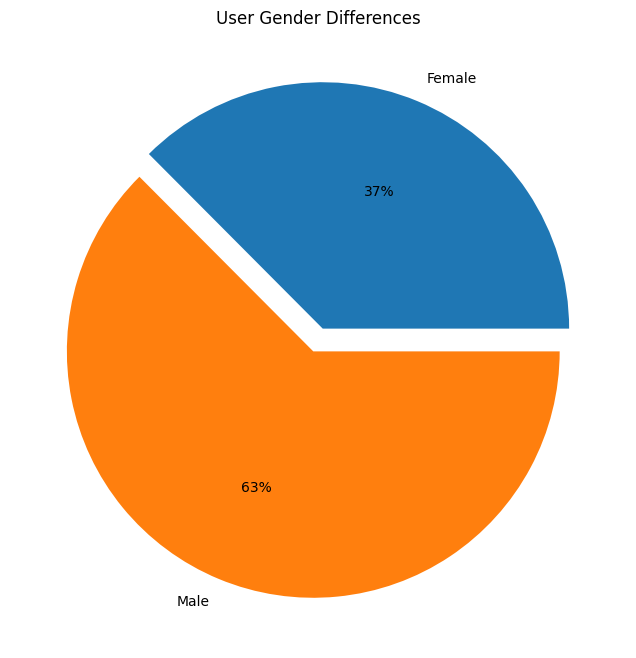

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(gender['user_id'], labels = gender['user_gender'], explode=(0.05,0.05), autopct='%1.0f%%')
plt.title('User Gender Differences')
plt.show()

<Axes: >

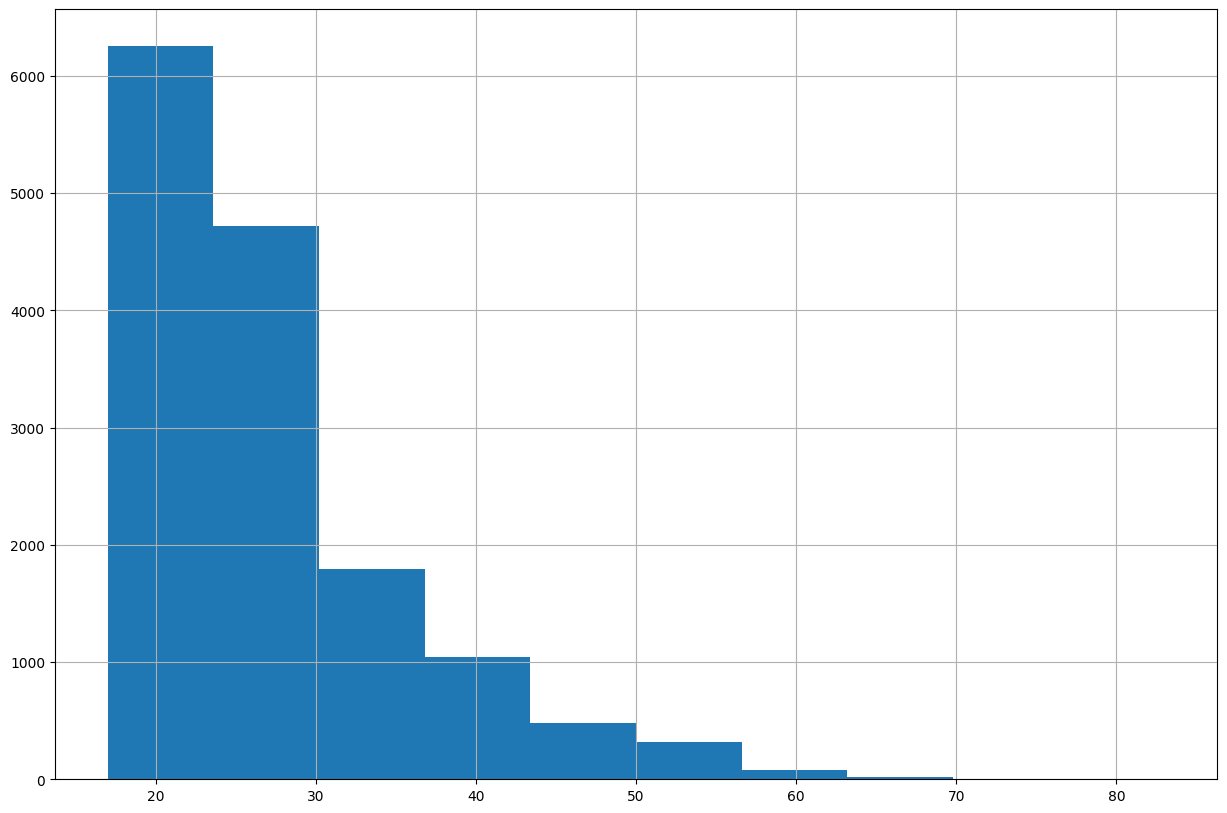

In [ ]:
df_user1['user_age'].hist(figsize=(15,10))

In [ ]:
# User Ages
age = df_eda.groupby('Age_Category')['user_id'].count()
age = age.reset_index()
age


,Age_Category,user_id
0,Boomers,41
1,GenX,533
2,GenZ,4881
3,Millenial,2822


Text(0.5, 1.0, 'Histogram amount of Age_Category')

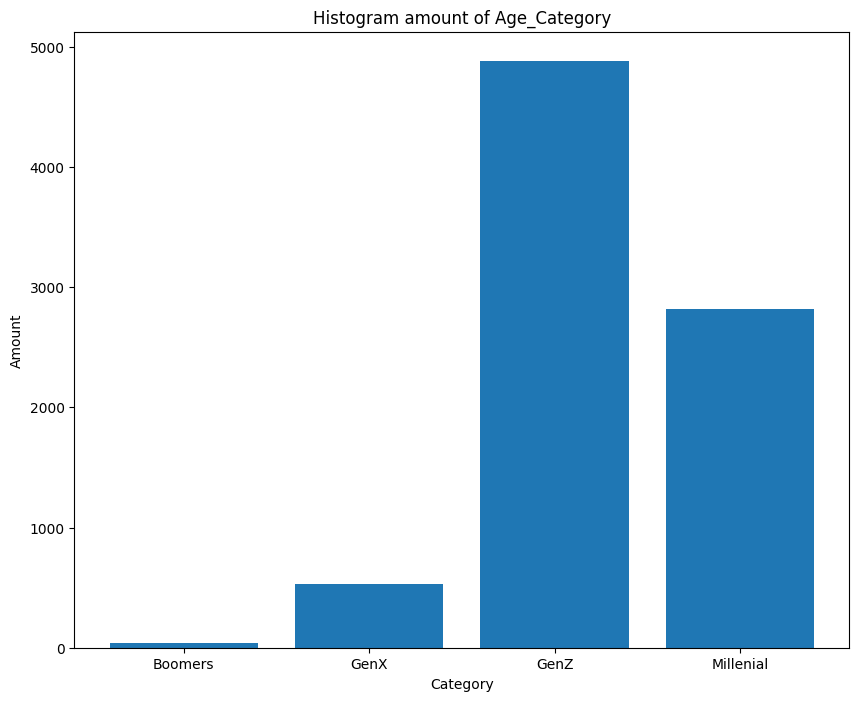

In [ ]:
categories = ['Boomers', 'GenX', 'GenZ', 'Millenial']
values = [41, 533, 4881, 2822]
#creating histogram
plt.figure(figsize=(10,8))
plt.bar(categories, values)
#adding label
plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Histogram amount of Age_Category')

In [ ]:
#user Occupation
df_eda['user_occupation'].value_counts()

Pelajar       4473
Swasta        1868
Others         928
IRT            478
Pengusaha      324
PNS            116
Guru            60
TNI/Polisi      26
Pensiunan        4
Name: user_occupation, dtype: int64

Text(0.5, 1.0, 'Histogram amount of user category')

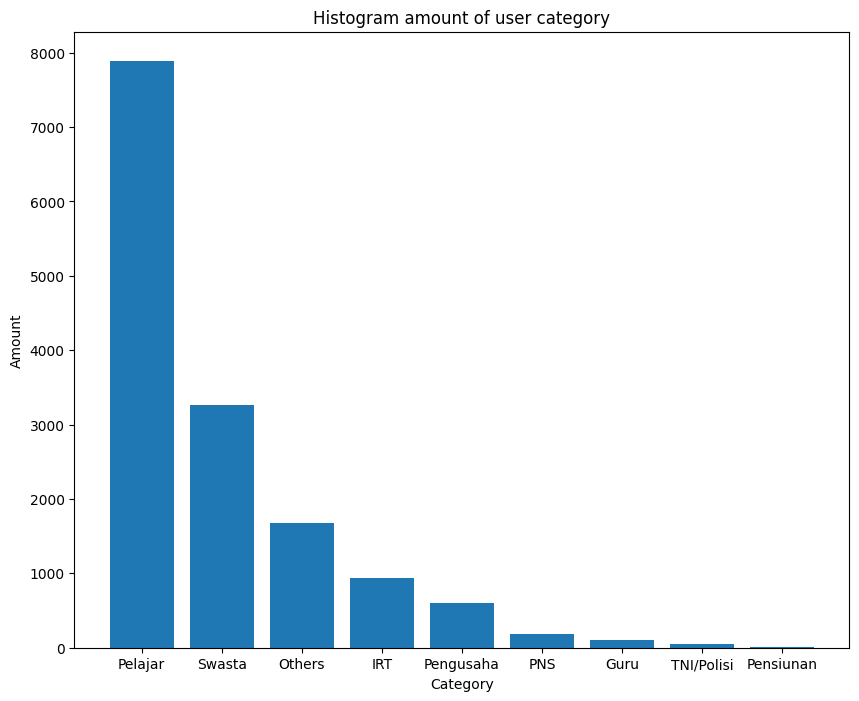

In [ ]:
categories = ['Pelajar', 'Swasta', 'Others', 'IRT', 'Pengusaha', 'PNS', 'Guru', 'TNI/Polisi', 'Pensiunan']
values = [7887, 3263, 1683, 934, 598, 191, 106, 45, 5]
#creating histogram
plt.figure(figsize=(10,8))
plt.bar(categories, values)
#adding label
plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Histogram amount of user category')

In [ ]:
#user income range
df_eda['user_income_range'] = df_eda['user_income_range'].str.replace('< 10 Juta','Level 0').replace('Rp 10 Juta - 50 Juta','Level 1').replace('> Rp 50 Juta - 100 Juta','Level 2').replace('> Rp 100 Juta - 500 Juta','Level 3').replace('> Rp 500 Juta - 1 Miliar','Level 4').replace('> Rp 1 Miliar','Level 4')
df_eda['user_income_range'].value_counts()

Level 0    3527
Level 1    2706
Level 2    1343
Level 3     637
Level 4      64
Name: user_income_range, dtype: int64

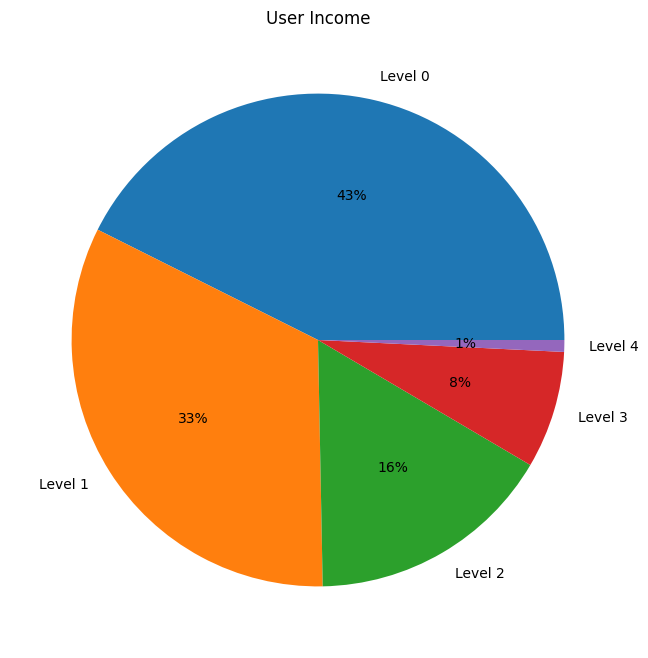

In [ ]:
df_eda['user_income_range'].value_counts()

data = df_eda['user_income_range'].value_counts()/14712*100
label = ['Level 0','Level 1','Level 2','Level 3','Level 4']

plt.figure(figsize=(9,8))
plt.pie(data, labels = label, autopct='%1.0f%%', explode=[0,0,0,0,0,], shadow=False, startangle=360)
plt.title('User Income')
plt.show()

## How many users buy products in each mutual funds?


Saham

In [ ]:
buy_saham = df_eda['buy_saham_transaction_amount'].sum()  
sell_saham = df_eda['sell_saham_transaction_amount'].sum() 
print(buy_saham)
print(sell_saham)

1590346630.0
-461122026.0


Total buy for Saham is 1,590,346,630 Billion

Total sell for Saham is 461,122,026 Billion

Pasar Uang

In [ ]:
buy_pu = df_eda['buy_pasar_uang_transaction_amount'].sum()
sell_pu = df_eda['sell_pasar_uang_transaction_amount'].sum()
print(buy_pu)
print(sell_pu)

3725638806.0
-1016380036.0


Total buy for 'Pasar Uang' is 3,725,638,806 Billion

Total sell for 'Pasar Uang' is 1,016,380,036 Billion

Pendapatan Tetap

In [ ]:
buy_pt = df_eda['buy_pendapatan_tetap_transaction_amount'].sum()
sell_pt = df_eda['sell_pendapatan_tetap_transaction_amount'].sum()
print(buy_pt)
print(sell_pt)

6551156971.0
-770282648.0


Total buy for 'Pendapatan Tetap' is 6,551,156,971 Billion

Total sell for 'Pendapatan Tetap' is 770,282,648 Billion

Campuran

In [ ]:
buy_cm = df_eda['buy_campuran_transaction_amount'].sum()
sell_cm = df_eda['sell_campuran_transaction_amount'].sum()
print(buy_cm)
print(sell_cm)

531427002.0
-177678064.0


Total buy for 'Campuran' is 531,427,002 Million

Total sell for 'Campuran' is 177,678,064 Million

Total all products

In [ ]:
total_buy = df_eda['total_buy_amount'].sum()
total_sell = df_eda['total_sell_amount'].sum()
print(total_buy)
print(total_sell)

12398569409
-2425462774


Total buy Amount for overall product is 12,398,569,409 billion

Total sell Amount for overall product is 2,425,462,774 billion

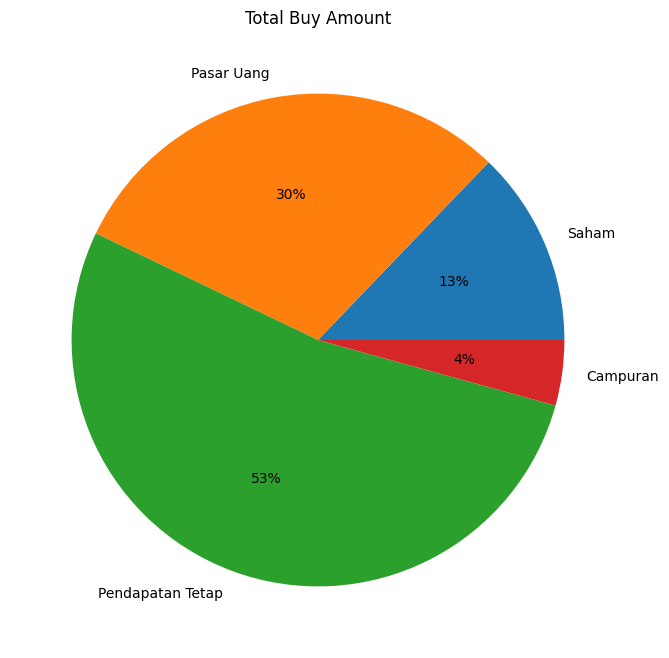

In [ ]:
data = [buy_saham, buy_pu, buy_pt, buy_cm]
label = ['Saham','Pasar Uang','Pendapatan Tetap','Campuran']

plt.figure(figsize=(9,8))
plt.pie(data, labels = label, autopct='%1.0f%%', explode=[0,0,0,0], shadow=False, startangle=360)
plt.title('Total Buy Amount')
plt.show()

The dominant product that user by is Pendapatan tetap which has 53% and the lowest product that buy by user is Campuran with 4%

# Identify Key trends

## Is there any trend on the transaction?

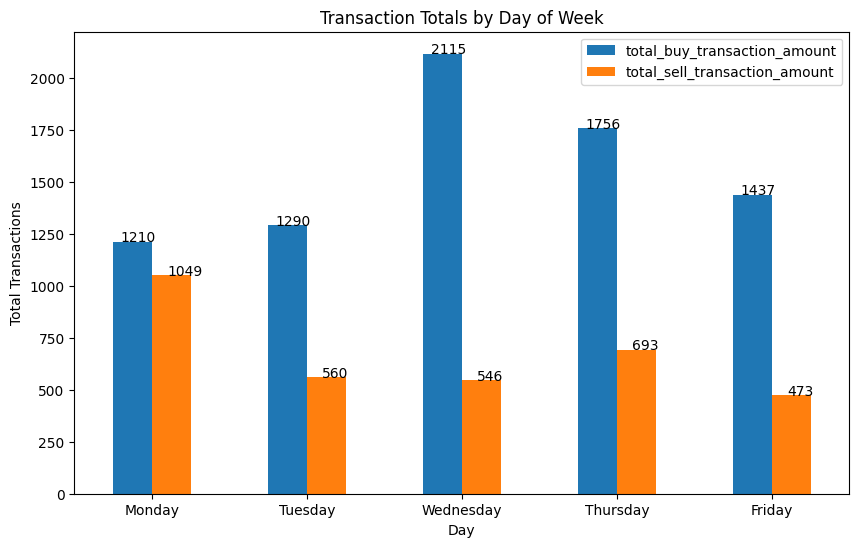

In [ ]:
# Group the data by day of the week and sum the total_buy and total_sell values
day_of_totals = df_trans1.groupby(df_trans1['date'].dt.dayofweek).count()[['total_buy_transaction_amount', 'total_sell_transaction_amount']]

# Define a list of weekday names to use as x-axis labels
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Set the figure size and create the axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the weekday totals as a bar chart and show the legend
day_of_totals.plot(kind='bar', ax=ax)

# Set the x-axis tick labels, label the axes, and set the title
ax.set_xticklabels(day_names, rotation=0)
ax.set_xlabel('Day')
ax.set_ylabel('Total Transactions')
ax.set_title('Transaction Totals by Day of Week')
for i, v in enumerate(day_of_totals.values):
 ax.text(i-0.2, v[0]+1, str(v[0]))
 ax.text(i+0.1, v[1]+1, str(v[1]))

# Show the plot
plt.show()



In [ ]:
trend = df_trans1.fillna(0)
trend.head(10)

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000
5,50701,2021-09-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000
6,50701,2021-09-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000
7,50701,2021-09-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000
8,50701,2021-09-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000
9,50701,2021-09-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000


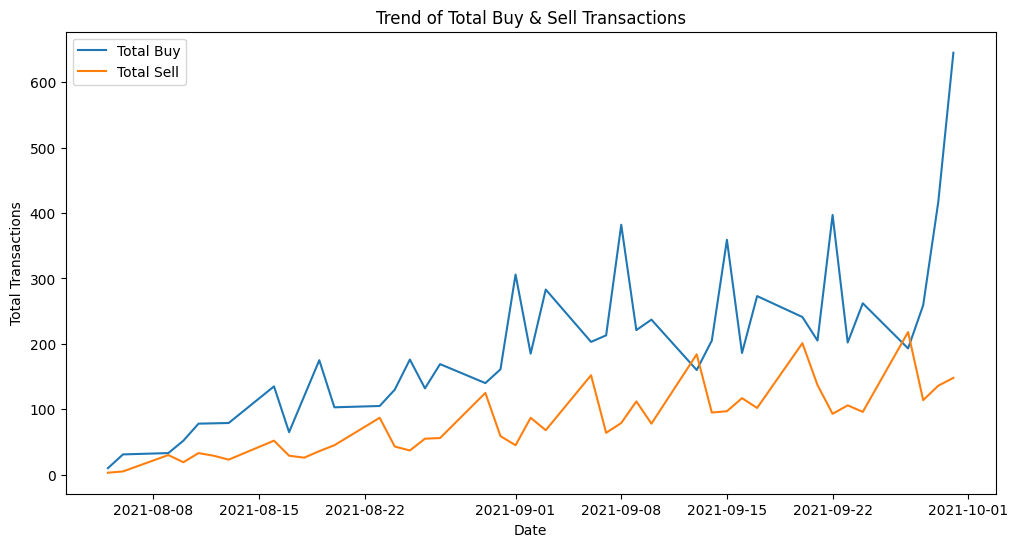

In [ ]:
trend_buy = trend[trend['total_buy_transaction_amount']>0]
trend_buy = trend_buy.groupby(['date'])
trend_buy = trend_buy['user_id'].agg(['count']).reset_index()

trend_sell = trend[trend['total_sell_transaction_amount']<0]
trend_sell = trend_sell.groupby(['date'])
trend_sell = trend_sell['user_id'].agg(['count']).reset_index()

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(trend_buy['date'], trend_buy['count'], label='Total Buy')
ax.plot(trend_sell['date'], trend_sell['count'], label='Total Sell')

ax.set_title('Trend of Total Buy & Sell Transactions')
ax.set_xlabel('Date')
ax.set_ylabel('Total Transactions')
ax.legend()

plt.show()


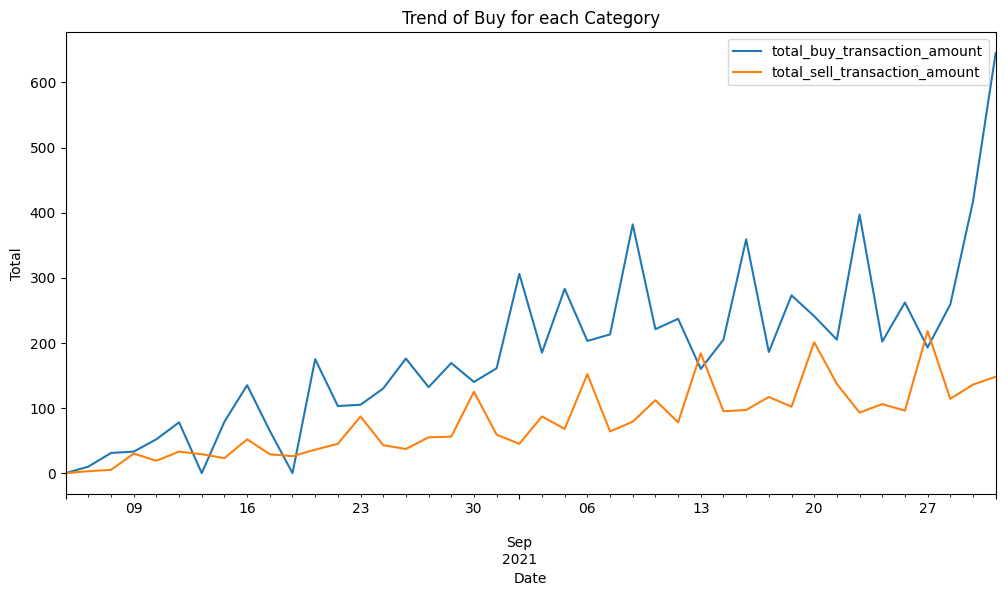

In [ ]:
df_trans.set_index('date', inplace=False)

trend_buy = df_trans.groupby('date').count()[['total_buy_transaction_amount','total_sell_transaction_amount']]

fig, ax = plt.subplots(figsize=(12,6))
trend_buy.plot(kind='line',ax=ax)
ax.set_title('Trend of Buy for each Category')
ax.set_xlabel('Date')
ax.set_ylabel('Total')

plt.show()

Insight:
*   The highest number of buying transaction are occured in Wednesday with total transaction 2115.
*   the highest number of selling transaction are occured in monday with total transactipon 1049 transaction.
*   The number of buying transaction are increasing from monday to wednesday and decreasing from thursday to friday.
*   The number of selling transactions are fluctuating.
*   The total amount of buy and sell is increasing so that the trend is positive  






## How about transaction trends for each product?

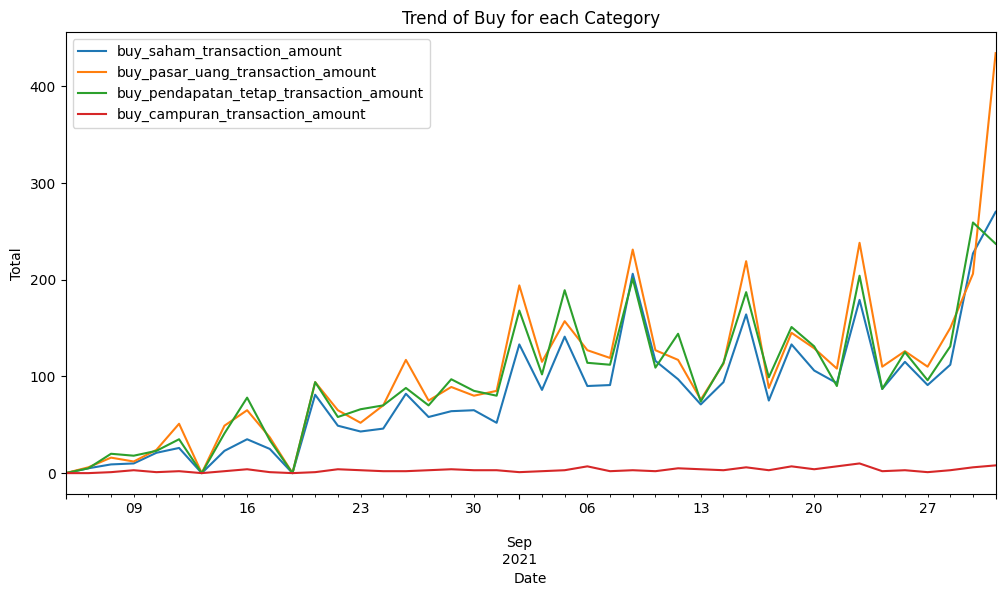

In [ ]:
df_trans.set_index('date', inplace=False)

trend_buy = df_trans.groupby('date').count()[['buy_saham_transaction_amount','buy_pasar_uang_transaction_amount','buy_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount']]

fig, ax = plt.subplots(figsize=(12,6))
trend_buy.plot(kind='line',ax=ax)
ax.set_title('Trend of Buy for each Category')
ax.set_xlabel('Date')
ax.set_ylabel('Total')

plt.show()

Insight:
*   The total amount of buy transaction in saham, pasar uang and pendapatan tetap tend to same line but in the end the transaction of pasar uang is highly increase
* However the amount of campuran has the lowest trend and the trend is stagnant



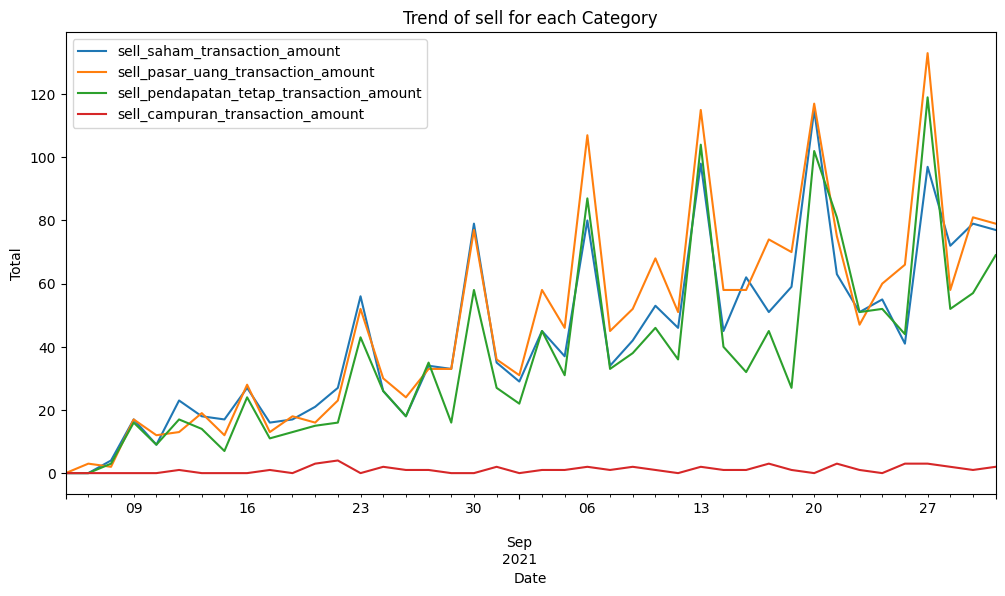

In [ ]:
df_trans.set_index('date', inplace=False)

trend_buy = df_trans.groupby('date').count()[['sell_saham_transaction_amount','sell_pasar_uang_transaction_amount','sell_pendapatan_tetap_transaction_amount','sell_campuran_transaction_amount']]

fig, ax = plt.subplots(figsize=(12,6))
trend_buy.plot(kind='line',ax=ax)
ax.set_title('Trend of sell for each Category')
ax.set_xlabel('Date')
ax.set_ylabel('Total')

plt.show()

Insight:
*   The total amount of buy transaction in saham, pasar uang and pendapatan tetap are tend to thesame line but the trend is fluctuating
* However the amount of campuran has the lowest trend and the trend is stagnant

## Total Invested Amount

In [ ]:
total_invested_amount = df_merged['end_of_month_invested_amount'].sum()
total_invested_amount

21273496501

# **E.Segmentation**

## Data Preparation

In [ ]:
#Make a copy of the clean data for segmentation
df_segmentation = df_active.copy()
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   8277 non-null   object        
 1   date_register                             8277 non-null   datetime64[ns]
 2   user_gender                               8277 non-null   category      
 3   user_age                                  8277 non-null   int64         
 4   user_occupation                           8277 non-null   object        
 5   user_income_range                         8277 non-null   object        
 6   referral_code_used                        8277 non-null   object        
 7   user_income_source                        8277 non-null   object        
 8   end_of_month_invested_amount              8277 non-null   int64         
 9   total_buy_amount              

Here we want to create our cluster using these feature :
* User Age
* User Gender
* User Occupation
* User Income range
* User referral
* User Income Source

## Library

In [ ]:
# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs

In [ ]:
#dropping irrelevant value
df_remove = df_segmentation.drop(['date_register','total_buy_amount','total_sell_amount','buy_saham_transaction_amount','sell_saham_transaction_amount','buy_pasar_uang_transaction_amount','sell_pasar_uang_transaction_amount','sell_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount','sell_campuran_transaction_amount','total_sell_transaction_amount','buy_pendapatan_tetap_transaction_amount','Age_Category','end_of_month_invested_amount'],axis=1,inplace=False)
df_remove.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   user_id                       8277 non-null   object  
 1   user_gender                   8277 non-null   category
 2   user_age                      8277 non-null   int64   
 3   user_occupation               8277 non-null   object  
 4   user_income_range             8277 non-null   object  
 5   referral_code_used            8277 non-null   object  
 6   user_income_source            8277 non-null   object  
 7   Birth_Year                    8277 non-null   int64   
 8   total_buy_transaction_amount  8277 non-null   float64 
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 590.2+ KB


## Correlation

In [ ]:
# I decided to choose total_buy_transaction_amount as independent variable.
# Checking the correlations of all columns to determine dependent variable
df_correlation= df_remove.copy()
df_correlation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   user_id                       8277 non-null   object  
 1   user_gender                   8277 non-null   category
 2   user_age                      8277 non-null   int64   
 3   user_occupation               8277 non-null   object  
 4   user_income_range             8277 non-null   object  
 5   referral_code_used            8277 non-null   object  
 6   user_income_source            8277 non-null   object  
 7   Birth_Year                    8277 non-null   int64   
 8   total_buy_transaction_amount  8277 non-null   float64 
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 590.2+ KB


In [ ]:
# Convert data type because we cannot analyze string data type
df_correlation['user_id'] = df_correlation['user_id'].astype(int)

In [ ]:
#converting data type using cat.code
df_correlation['user_gender'] = df_correlation['user_gender'].astype('category')
df_correlation['user_gender'] = df_correlation['user_gender'].cat.codes
df_correlation['user_age'] = df_correlation['user_age'].astype('category')
df_correlation['user_age'] = df_correlation['user_age'].cat.codes
df_correlation['referral_code_used'] = df_correlation['referral_code_used'].astype('category')
df_correlation['referral_code_used'] = df_correlation['referral_code_used'].cat.codes
df_correlation['user_occupation'] = df_correlation['user_occupation'].astype('category')
df_correlation['user_occupation'] = df_correlation['user_occupation'].cat.codes
df_correlation['user_income_source'] = df_correlation['user_income_source'].astype('category')
df_correlation['user_income_source'] = df_correlation['user_income_source'].cat.codes
df_correlation['user_income_range'] = df_correlation['user_income_range'].astype('category')
df_correlation['user_income_range'] = df_correlation['user_income_range'].cat.codes

<ipython-input-88-04ebb86fe949>:12: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  corr_matrix = df_correlation[data].corr()


<Axes: >

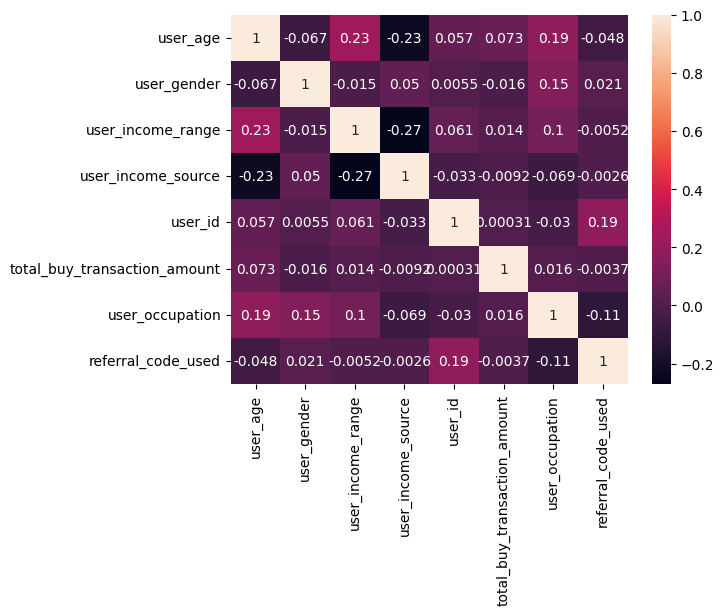

In [ ]:
data = {'total_buy_transaction_amount',
        'user_age',
        'user_id',
        'user_gender',
        'referral_code_used',
        'user_income_range',
        'user_income_source',
        'user_occupation'}

df = pd.DataFrame(data)

corr_matrix = df_correlation[data].corr()

sns.heatmap(corr_matrix, annot=True)

In [ ]:
df_correlation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       8277 non-null   int64  
 1   user_gender                   8277 non-null   int8   
 2   user_age                      8277 non-null   int8   
 3   user_occupation               8277 non-null   int8   
 4   user_income_range             8277 non-null   int8   
 5   referral_code_used            8277 non-null   int8   
 6   user_income_source            8277 non-null   int8   
 7   Birth_Year                    8277 non-null   int64  
 8   total_buy_transaction_amount  8277 non-null   float64
dtypes: float64(1), int64(2), int8(6)
memory usage: 307.2 KB


## Check Data Distribution





In [ ]:
#dropping columns that has weak correlations with total_buy
df_scale = df_correlation.drop(['user_gender',
        'referral_code_used',
        'user_income_range',
        'user_income_source',
        'user_occupation'],axis=1,inplace=False)
df_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       8277 non-null   int64  
 1   user_age                      8277 non-null   int8   
 2   Birth_Year                    8277 non-null   int64  
 3   total_buy_transaction_amount  8277 non-null   float64
dtypes: float64(1), int64(2), int8(1)
memory usage: 266.7 KB


### No scaling

<Axes: xlabel='user_age', ylabel='total_buy_transaction_amount'>

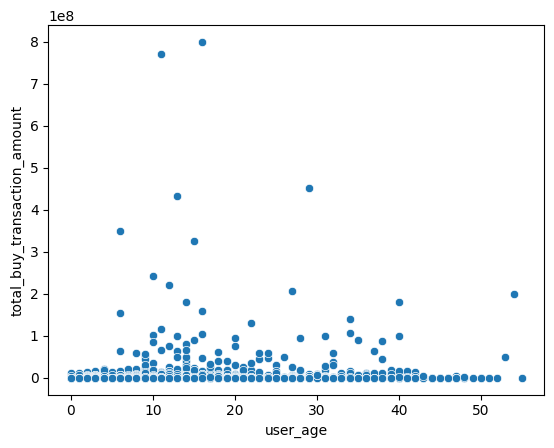

In [ ]:
sns.scatterplot(data = df_scale, x='user_age', y='total_buy_transaction_amount')

### Standar Scaler

In [ ]:
# Define Standard Scale dataset
ss_scale_df = df_scale.copy()
column = ['user_age','total_buy_transaction_amount']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

<Axes: xlabel='user_age', ylabel='total_buy_transaction_amount'>

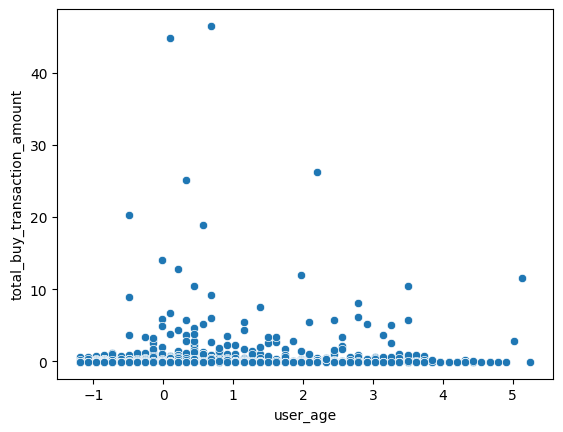

In [ ]:
sns.scatterplot (data = ss_scale_df, x='user_age', y='total_buy_transaction_amount')

In [ ]:
ss_scale_df[['user_age', 'total_buy_transaction_amount']].head()

,user_age,total_buy_transaction_amount
0,3.025296,-0.081438
1,2.321503,0.407905
2,3.025296,-0.078584
3,3.729090,-0.087264
4,3.494492,-0.029008


### Robust scaler

In [ ]:
# Define Robust Scale dataset
rs_scale_df = df_scale.copy()
column = df_scale.columns.to_list()
# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['user_age', 'total_buy_transaction_amount']] = rs_scaler.fit_transform(rs_scale_df[['user_age', 'total_buy_transaction_amount']])

<Axes: xlabel='user_age', ylabel='total_buy_transaction_amount'>

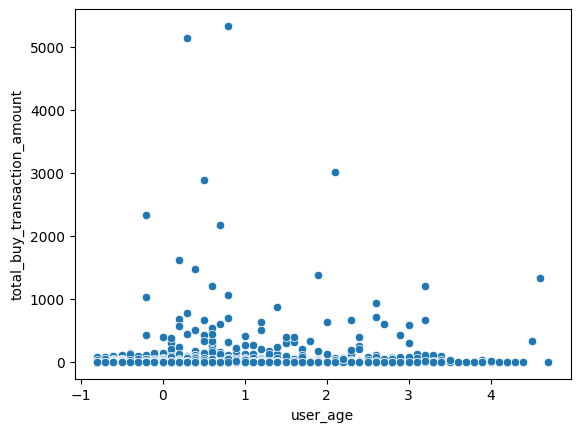

In [ ]:
sns.scatterplot (data = rs_scale_df, x='user_age', y='total_buy_transaction_amount')

In [ ]:
ss_scale_df[['user_age', 'total_buy_transaction_amount']].head()

,user_age,total_buy_transaction_amount
0,3.025296,-0.081438
1,2.321503,0.407905
2,3.025296,-0.078584
3,3.729090,-0.087264
4,3.494492,-0.029008


### MinMax Scaler

In [ ]:
# Define Minmax Scale dataset
mm_scale_df = df_scale.copy()
column = df_scale.columns.to_list()
# using Minmax Scalerbuy_pendapatan_tetap_transaction_amount
mm_scaler = MinMaxScaler()
mm_scale_df[['user_age', 'total_buy_transaction_amount']] = mm_scaler.fit_transform(mm_scale_df[['user_age', 'total_buy_transaction_amount']])

<Axes: xlabel='user_age', ylabel='total_buy_transaction_amount'>

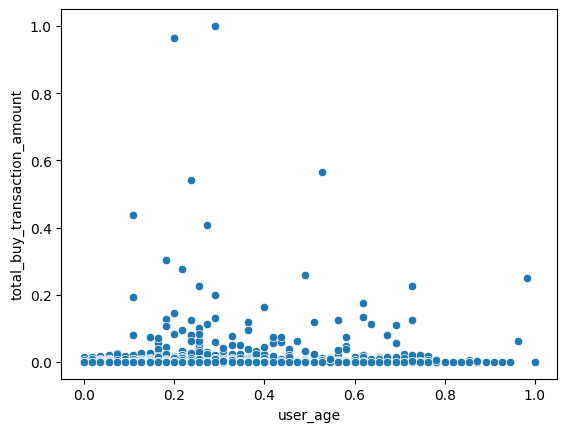

In [ ]:
sns.scatterplot (data = mm_scale_df, x='user_age', y='total_buy_transaction_amount')

## Clustering

In [ ]:
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs  

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format

### Elbow Method

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

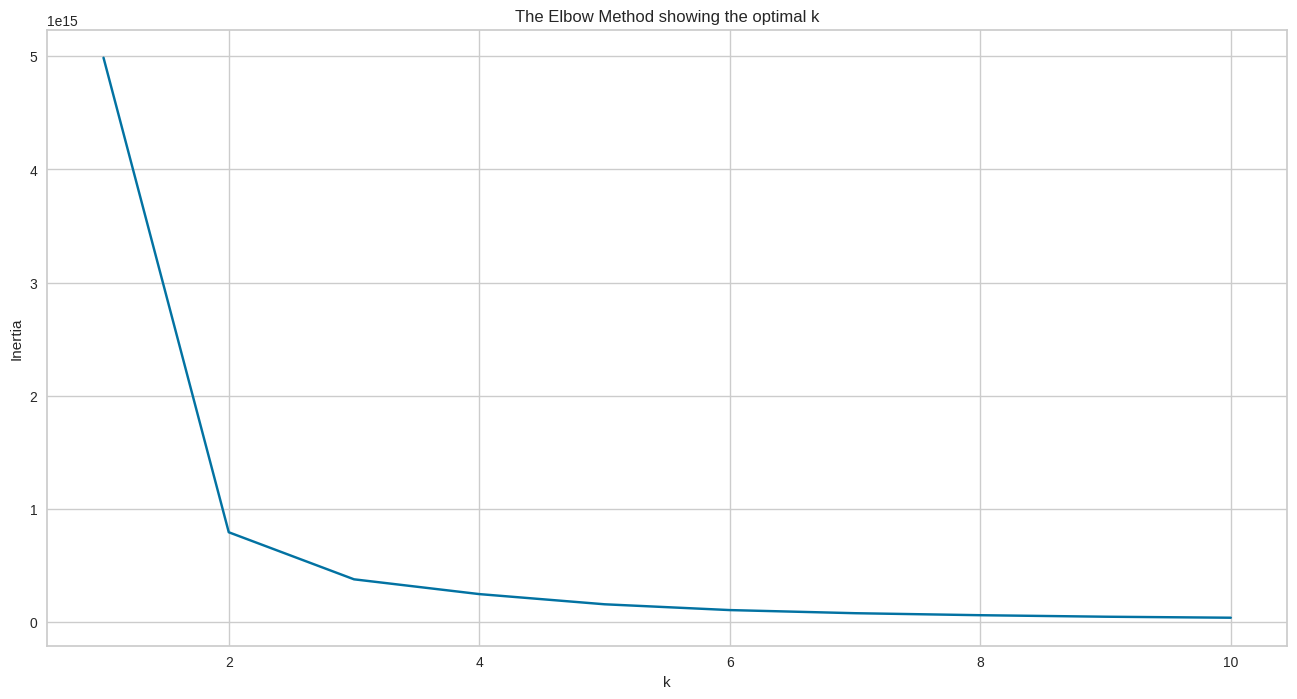

[4987185575713334.0, 793572715252561.0, 377680775406242.6, 247076470332829.75, 157066445018248.25, 105817583978983.25, 78219913502727.44, 60515122636804.734, 47148951559969.734, 38275413515503.79]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(mm_scale_df)  
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

### Silhouette Analysis

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6664047606504937


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5970137488756173


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.577634224294559


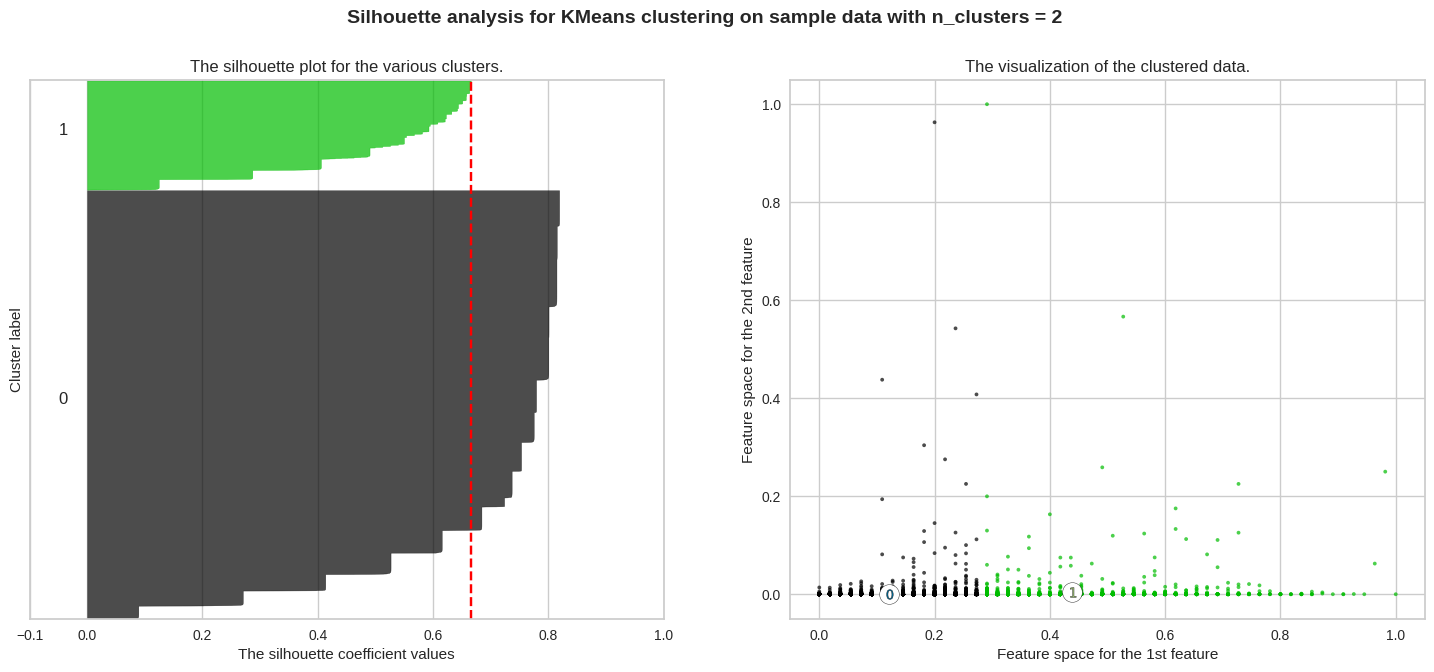

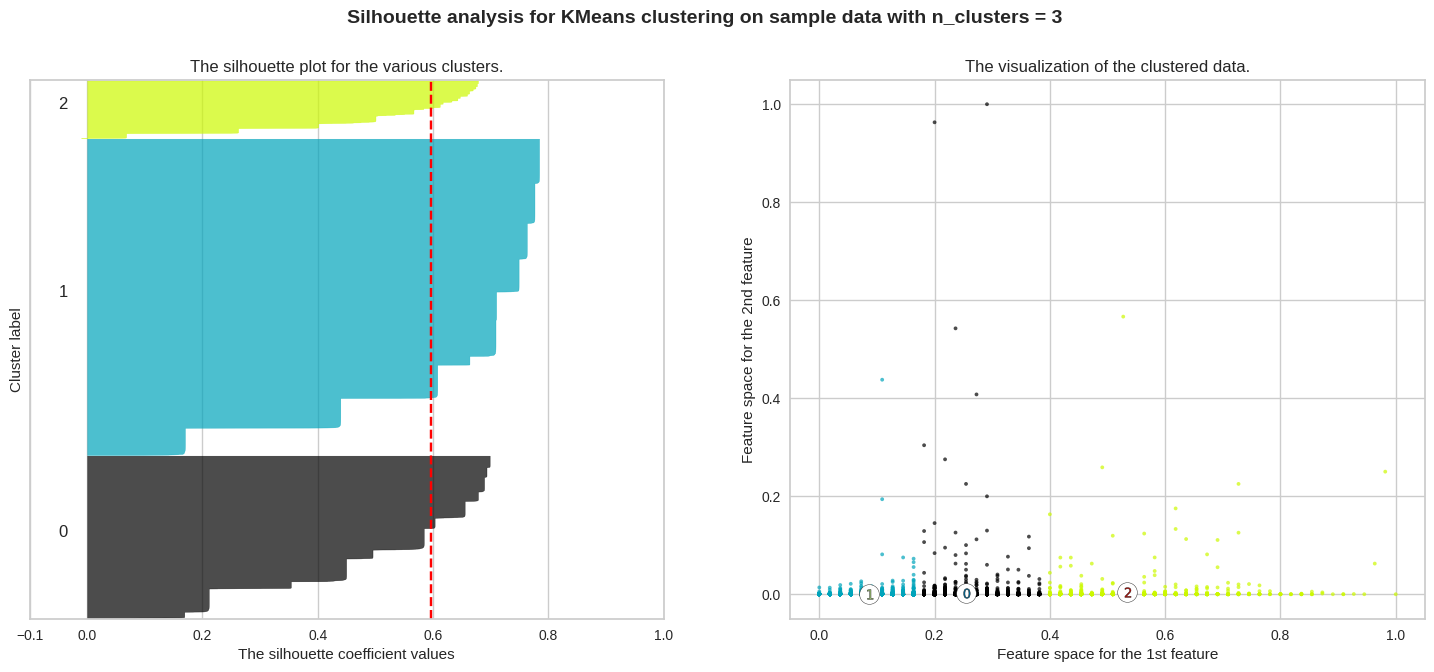

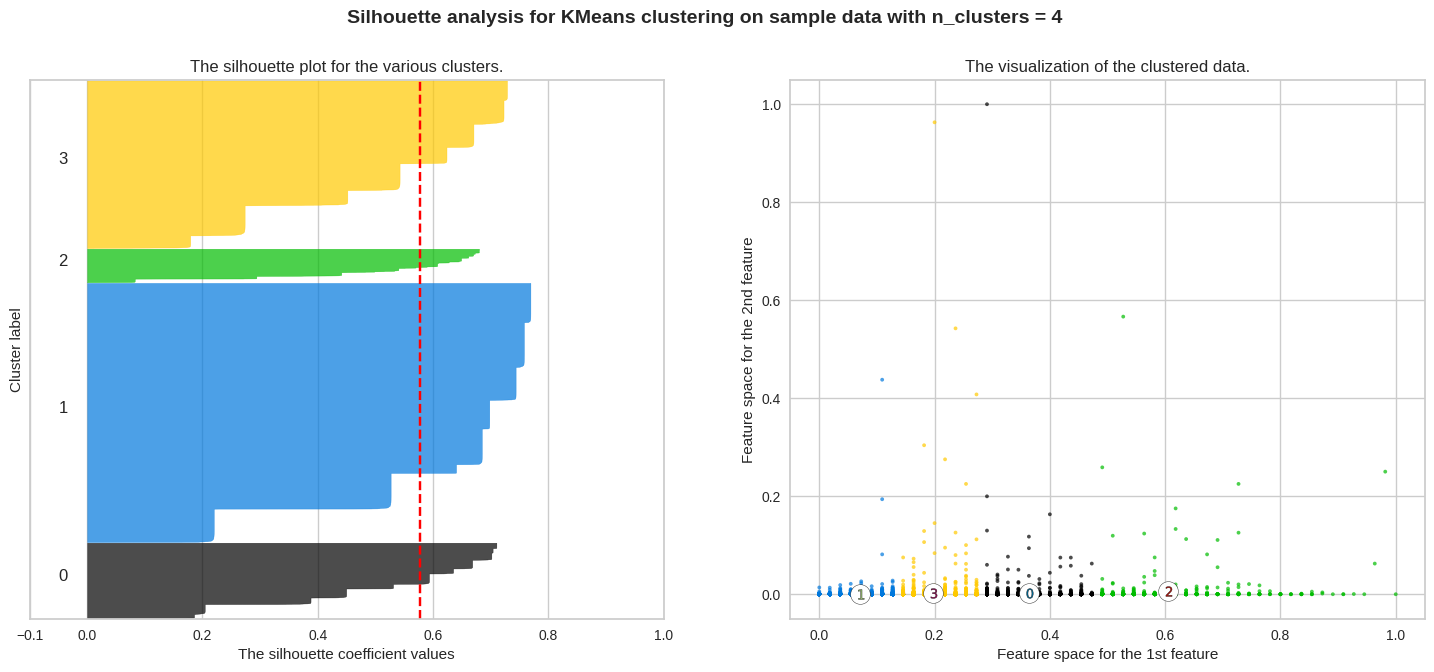

In [ ]:
silhoutte_analysis(mm_scale_df[['user_age', 'total_buy_transaction_amount']],list(range(2,5)))

## Segmentation

In [ ]:
# make cluster
Cluster_3 = mm_scale_df.copy()

cluster_model = KMeans(n_clusters=3) 
cluster_model.fit_predict(Cluster_3[['user_age', 'total_buy_transaction_amount']])
Cluster_3['cluster'] = cluster_model.labels_
Cluster_3.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,user_age,Birth_Year,total_buy_transaction_amount,cluster
0,3816789,0.65,1970,0.00,2
1,3802293,0.55,1976,0.01,2
2,3049927,0.65,1970,0.00,2
3,3836491,0.76,1964,0.00,2
4,3783302,0.73,1966,0.00,2


<Axes: xlabel='cluster', ylabel='total_buy_transaction_amount'>

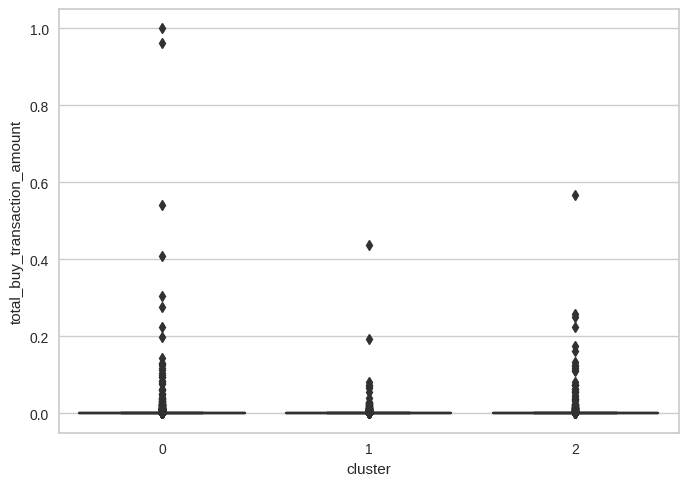

In [ ]:
# Number of transaction
sns.boxplot (data = Cluster_3 , x ='cluster' , y ='total_buy_transaction_amount')

<Axes: xlabel='cluster', ylabel='user_age'>

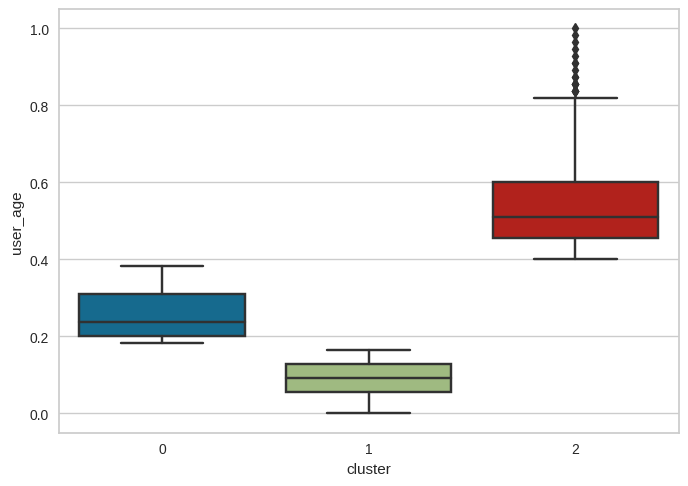

In [ ]:
# Number of transaction
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='user_age')

In [ ]:
# make cluster
Cluster_4 = mm_scale_df.copy()

cluster_model = KMeans(n_clusters=4)
cluster_model.fit_predict(Cluster_4[['user_age', 'total_buy_transaction_amount']])
Cluster_4['cluster'] = cluster_model.labels_
Cluster_4.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,user_age,Birth_Year,total_buy_transaction_amount,cluster
0,3816789,0.65,1970,0.00,1
1,3802293,0.55,1976,0.01,1
2,3049927,0.65,1970,0.00,1
3,3836491,0.76,1964,0.00,1
4,3783302,0.73,1966,0.00,1


<Axes: xlabel='cluster', ylabel='total_buy_transaction_amount'>

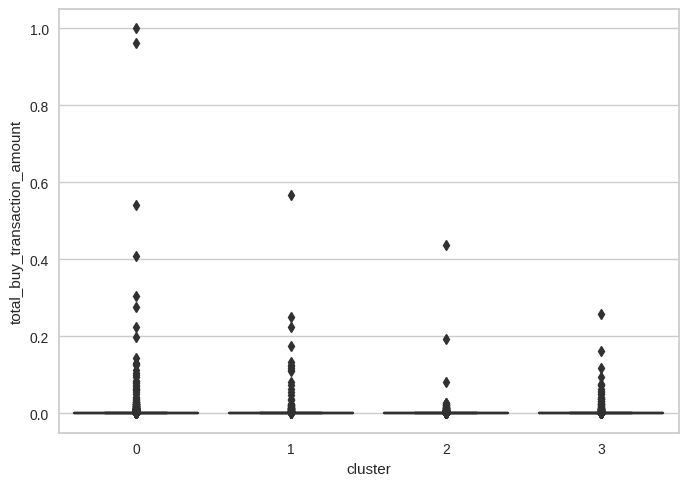

In [ ]:
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='total_buy_transaction_amount')

<Axes: xlabel='cluster', ylabel='user_age'>

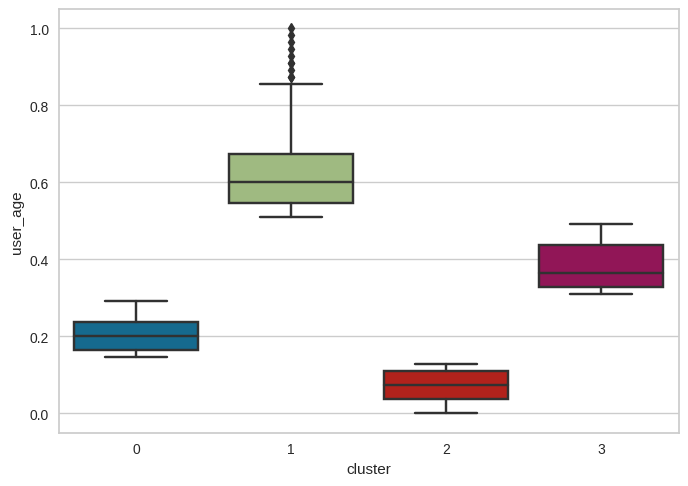

In [ ]:
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='user_age')

## Merge cluster with dataset

In [ ]:
Cluster_3['user_id'] = Cluster_3['user_id'].astype(str)

In [ ]:
df_segmented = Cluster_3.merge(df_remove,how= 'inner', on = 'user_id')
df_segmented

,user_id,user_age_x,Birth_Year_x,total_buy_transaction_amount_x,cluster,user_gender,user_age_y,user_occupation,user_income_range,referral_code_used,user_income_source,Birth_Year_y,total_buy_transaction_amount_y
0,3816789,0.65,1970,0.00,2,Female,53,IRT,> Rp 50 Juta - 100 Juta,not_using_referral,Gaji,1970,"100,000.00"
1,3802293,0.55,1976,0.01,2,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,1976,"8,500,000.00"
2,3049927,0.65,1970,0.00,2,Male,53,Swasta,< 10 Juta,not_using_referral,Gaji,1970,"149,000.00"
3,3836491,0.76,1964,0.00,2,Male,59,Others,< 10 Juta,used referral,Lainnya,1964,0.00
4,3783302,0.73,1966,0.00,2,Male,57,Swasta,> Rp 50 Juta - 100 Juta,not_using_referral,Gaji,1966,"1,000,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,0.58,1974,0.00,2,Male,49,Swasta,> Rp 100 Juta - 500 Juta,not_using_referral,Lainnya,1974,"350,000.00"
8273,3798265,0.58,1974,0.00,2,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,1974,"25,000.00"
8274,3670811,0.58,1974,0.00,2,Male,49,Swasta,> Rp 50 Juta - 100 Juta,not_using_referral,Gaji,1974,"240,000.00"
8275,3812221,0.58,1974,0.00,2,Male,49,PNS,> Rp 100 Juta - 500 Juta,not_using_referral,Gaji,1974,"150,000.00"


## Visualize Cluster

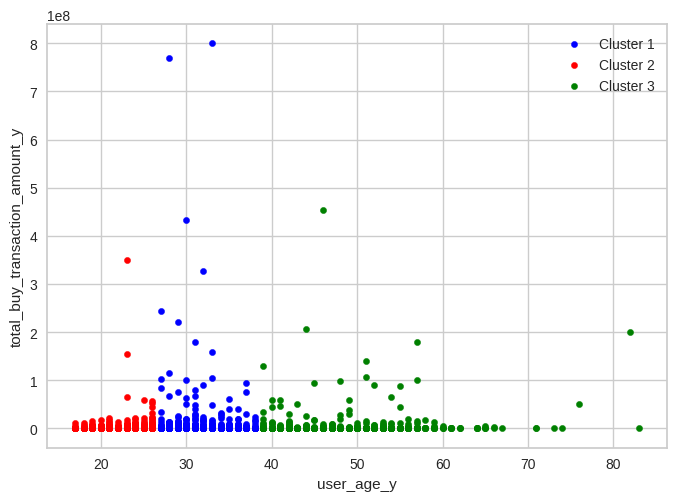

In [ ]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='user_age_y', y='total_buy_transaction_amount_y', c='blue', label='Cluster 1')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='user_age_y', y='total_buy_transaction_amount_y', c='red', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='user_age_y', y='total_buy_transaction_amount_y', c='green', label='Cluster 3', ax = cluster_scatter)

## Descriptive Statistic

In [ ]:
df_segmented.groupby('cluster',as_index = False)[['user_age_y','total_buy_transaction_amount_y']].agg(['count','mean','min','max','median']).T


cluster                                            0              1  \
user_age_y                     count        2,507.00       4,881.00   
                               mean            31.04          21.75   
                               min             27.00          17.00   
                               max             38.00          26.00   
                               median          30.00          22.00   
total_buy_transaction_amount_y count        2,507.00       4,881.00   
                               mean     2,645,542.14     499,356.94   
                               min              0.00           0.00   
                               max    799,500,000.00 350,000,000.00   
                               median           0.00           0.00   

cluster                                            2  
user_age_y                     count          889.00  
                               mean            46.45  
                               min             39.00  
                               max             83.00  
                               median          45.00  
total_buy_transaction_amount_y count          889.00  
                               mean     3,744,470.22  
                               min              0.00  
                               max    452,950,000.00  
                               median      10,000.00

## Cluster Interpretation

In [ ]:
pd.set_option('display.max_columns',None)
df_segmented.head(5)

,user_id,user_age_x,Birth_Year_x,total_buy_transaction_amount_x,cluster,user_gender,user_age_y,user_occupation,user_income_range,referral_code_used,user_income_source,Birth_Year_y,total_buy_transaction_amount_y
0,3816789,0.65,1970,0.00,2,Female,53,IRT,> Rp 50 Juta - 100 Juta,not_using_referral,Gaji,1970,"100,000.00"
1,3802293,0.55,1976,0.01,2,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,1976,"8,500,000.00"
2,3049927,0.65,1970,0.00,2,Male,53,Swasta,< 10 Juta,not_using_referral,Gaji,1970,"149,000.00"
3,3836491,0.76,1964,0.00,2,Male,59,Others,< 10 Juta,used referral,Lainnya,1964,0.00
4,3783302,0.73,1966,0.00,2,Male,57,Swasta,> Rp 50 Juta - 100 Juta,not_using_referral,Gaji,1966,"1,000,000.00"


In [ ]:
df_segmented.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   user_id                         8277 non-null   object  
 1   user_age_x                      8277 non-null   float64 
 2   Birth_Year_x                    8277 non-null   int64   
 3   total_buy_transaction_amount_x  8277 non-null   float64 
 4   cluster                         8277 non-null   int32   
 5   user_gender                     8277 non-null   category
 6   user_age_y                      8277 non-null   int64   
 7   user_occupation                 8277 non-null   object  
 8   user_income_range               8277 non-null   object  
 9   referral_code_used              8277 non-null   object  
 10  user_income_source              8277 non-null   object  
 11  Birth_Year_y                    8277 non-null   int64   
 12  total_buy_transactio

Things can be analyzed :
* User Age
* Total buy transaction amount
* User Gender
* User Occupation
* User Income range 
* User Income Source



### User Age

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['user_age_y'].agg(['count','mean','max','min'])

,count,mean,max,min
cluster,,,,
0,2507,31.04,38,27
1,4881,21.75,26,17
2,889,46.45,83,39


Insight :
*   0 = There are 2582 total user with average age 21. The maximum age in this cluster is 26 yo and the minimum user age in this cluster is 17
*   1 = There are 4881 total user with average age 31. The maximum age in this cluster is 39 yo and the minimum user age in this cluster is 27
*   2 = There are 814 total user with average age 47. The maximum age in this cluster is 83 yo and the minimum user age in this cluster is 40


Recommendation

0 = This cluster is relatively young, with an average age of 21 and a maximum age of 26. One potential thematic strategy that may be relevant for this cluster is technology, as younger generations tend to be more tech-savvy and interested in innovative technologies. Another potential thematic strategy could be sustainability or environmentalism, as younger generations tend to be more environmentally conscious.

1 = This cluster has a wider age range, with an average age of 31 and a maximum age of 39. One potential thematic strategy that may be relevant for this cluster is healthcare, as individuals in their 30s may be more concerned about their health and wellness. Another potential thematic strategy could be consumer goods or e-commerce, as this age group tends to have more purchasing power and may be more likely to shop online.

2 = This cluster is relatively older, with an average age of 47 and a maximum age of 83. One potential thematic strategy that may be relevant for this cluster is retirement or income, as individuals in their late 40s and beyond may be more focused on saving for retirement and generating income. Another potential thematic strategy could be healthcare, as this age group may have more health concerns and may require more medical attention.

### Total buy transaction amount

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['total_buy_transaction_amount_y'].agg(['count','mean','max','min','sum'])

,count,mean,max,min,sum
cluster,,,,,
0,2507,"2,645,542.14","799,500,000.00",0.00,"6,632,374,144.00"
1,4881,"499,356.94","350,000,000.00",0.00,"2,437,361,242.00"
2,889,"3,744,470.22","452,950,000.00",0.00,"3,328,834,023.00"


insight
*   0  have the average total buy 499,356.94 = konservatif Investor
*   1 have the average total buy 2,657,033.39 =  Investor Investor
*   2 have the average total buy 3,809,272.66 = Agresif Investor



Recommendation

0 = With an average total buy of 499,356.94, many users in this cluster may prefer low-risk investment options that provide stable returns over time. The campaign can highlight the potential benefits of mutual funds as a way to achieve long-term growth with a lower risk profile.

1 = With an average total buy of 2,657,033.39, many users in this cluster may be interested in learning about how mutual funds can provide exposure to different asset classes and investment styles, while still offering diversification and risk management.

2 = With an average total buy of 3,809,272.66, many users in this cluster may be comfortable with higher levels of risk in pursuit of greater potential returns. The campaign can highlight the potential benefits of mutual funds as a way to achieve high returns through exposure to emerging markets, alternative assets, or other high-growth opportunities



### User Gender

In [ ]:
df_segmented.groupby(['cluster'])['user_gender'].describe()

,count,unique,top,freq
cluster,,,,
0,2507,2,Male,1547
1,4881,2,Male,3131
2,889,2,Male,498


Insight 
*   All cluster are dominated with Male users 

0 = 64 % male

1 = 61 % male

2 = 54 % male  



Recommendation
when the user is dominated by male the campaign marketing could focus on themes that appeal specifically to men, such as financial planning for retirement, investing in technology or emerging markets, or diversifying portfolios for long-term growth. The campaign could use language and imagery that speaks directly to men's interests and concerns, and could also highlight success stories of male investors who have achieved significant returns through strategic mutual fund investments.

### User Occupation

In [ ]:
df_segmented.groupby(['cluster'])['user_occupation'].describe()

,count,unique,top,freq
cluster,,,,
0,2507,8,Swasta,1112
1,4881,8,Pelajar,3887
2,889,9,Swasta,447


Insight
*   0 = the most user in this cluster is Pelajar
*   1 and 2 = the most user are Swasta 



Recommendation

*   0 =  because the dominan user in the cluster 0 is pelajar then the campaign could emphasize the benefits of investing early in life and provide information on how mutual funds can help Pelajar build wealth over time. The campaign could also offer educational resources and tools that help Pelajar understand the basics of investing and how to make informed decisions about their portfolios.

* 1 & 2 = these cluster dominated by Swasta users, a thematic campaign marketing for mutual funds could emphasize the benefits of investing in funds that align with their interests or industries. the campaign could provide information on how mutual funds can help Swasta users achieve their financial goals, such as retirement planning or saving for a down payment on a home.



In [ ]:
df_segmented.groupby(['cluster'])['user_income_range'].describe()

,count,unique,top,freq
cluster,,,,
0,2507,6,Rp 10 Juta - 50 Juta,936
1,4881,6,< 10 Juta,2813
2,889,6,Rp 10 Juta - 50 Juta,264


Insight
*   0 = The user in this cluster has income in range under 10Juta
*   1 and 2 = The user in this cluster has incomes in range 10-50 juta



Recommendation
*   0 = the marketing strategy may focus on promoting mutual funds that offer low-risk investment options with stable returns, such as money market or fixed income funds.
*   1 and 2 = the marketing strategy may focus on promoting mutual funds that offer higher returns with moderate risk, such as equity funds or balanced funds



### User Income Source

In [ ]:
df_segmented.groupby(['cluster'])['user_income_source'].describe()

,count,unique,top,freq
cluster,,,,
0,2507,10,Gaji,1858
1,4881,10,Gaji,2733
2,889,10,Gaji,551


Insight
All user in the all clusters has income source from gaji



# Clustering Name and Comparison

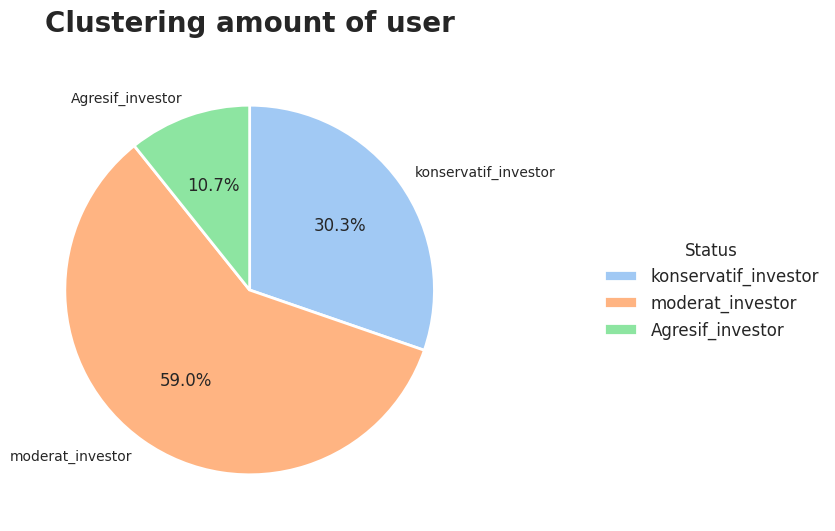

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the categories and their values
categories = ['konservatif_investor', 'moderat_investor', 'Agresif_investor']
values = [2507, 4881, 889]

# Create a pie chart using seaborn
sns.set_style("whitegrid")
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# Customize the chart
plt.title("Clustering amount of user", fontsize=20, fontweight='bold', pad=20)
plt.legend(title='Status', loc="center", bbox_to_anchor=(1.5, 0.5), fontsize=12)

# Display the chart
plt.show()
